In [1]:
# Import our dependencies.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
import psycopg2
# Display matrix
import seaborn as sn
import matplotlib.pyplot as plt


In [2]:
# Pass in password once.  ### Add your passwork here <pw> ###
postgresInfo = 'postgresql://postgres:<pw>@localhost/Weather_Crime'

In [3]:
## Create table and fill with contents of dataframe  - all_crime
conn_string = postgresInfo

db = create_engine(conn_string)
conn = db.connect()

# Create dataframs
# df = pd.DataFrame(data)
# all_crime_data_df.to_sql('all_crime', con=conn, if_exists='replace',
#           index=False)

conn = psycopg2.connect(conn_string)
conn.autocommit = True
cursor = conn.cursor()

crime_df = pd.read_sql_query('''SELECT * FROM all_crime;''', db)

# sql1 = '''select * from all_crime;'''
# cursor.execute(sql1)
# for i in cursor.fetchall():
#     print(i)
crime_df

,event_unique_id,crime,occ_year,occ_month,occ_day,occ_dow,occ_hour,premises_type,hood_140,neighbourhood_140,long_wgs84,lat_wgs84,date
0,GO-20155154,assault,2015,January,1,Thursday,23,House,115,Mount Dennis (115),-79.504668,43.693238,2015-01-01
1,GO-20151233,assault,2015,January,1,Thursday,3,Commercial,77,Waterfront Communities-The Island (77),-79.392855,43.647315,2015-01-01
2,GO-2015862,assault,2015,January,1,Thursday,2,Commercial,77,Waterfront Communities-The Island (77),-79.387700,43.649776,2015-01-01
3,GO-2015182,assault,2015,January,1,Thursday,0,Commercial,1,West Humber-Clairville (1),-79.595562,43.686751,2015-01-01
4,GO-2015276,assault,2015,January,1,Thursday,0,Outside,77,Waterfront Communities-The Island (77),-79.400096,43.645835,2015-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
166507,GO-20181887731,homicide,2018,October,12,Friday,0,None,75,Church-Yonge Corridor (75),-79.376699,43.656958,2018-10-12
166508,GO-20181923388,homicide,2018,October,18,Thursday,0,None,120,Clairlea-Birchmount (120),-79.286292,43.699070,2018-10-18
166509,GO-20181939006,homicide,2018,October,20,Saturday,0,None,124,Kennedy Park (124),-79.264551,43.732765,2018-10-20
166510,GO-20182113063,homicide,2018,November,16,Friday,0,None,73,Moss Park (73),-79.369005,43.654614,2018-11-16


In [4]:
## Create table and fill with contents of dataframe  - weather
conn_string = postgresInfo

db = create_engine(conn_string)
conn = db.connect()

# Create dataframs
# df = pd.DataFrame(data)
# all_crime_data_df.to_sql('all_crime', con=conn, if_exists='replace',
#           index=False)

conn = psycopg2.connect(conn_string)
conn.autocommit = True
cursor = conn.cursor()

weather_df = pd.read_sql_query('''SELECT * FROM weather;''', db)

# sql1 = '''select * from all_crime;'''
# cursor.execute(sql1)
# for i in cursor.fetchall():
#     print(i)
weather_df

,date,max_temperature,min_temperature,max_relative_humidity,avg_relative_humidity,avg_pressure_sea,max_wind_speed,precipitation,rain,snow,snow_on_ground,daylight,avg_cloud_cover_8
0,2018-12-31,5.0,-2.5,94,79.5,100.78,21,13.6,13.6,0.0,0.0,8.98,4.5
1,2018-12-30,0.7,-6.6,88,78.0,102.03,24,1.2,0.0,1.6,2.0,8.97,5.0
2,2018-12-29,2.7,-7.0,80,68.0,101.86,34,0.0,0.0,0.0,0.0,8.95,4.5
3,2018-12-28,12.4,2.7,95,84.5,100.89,30,1.8,1.8,0.0,0.0,8.93,4.5
4,2018-12-27,2.8,-7.4,87,74.0,102.52,30,5.4,5.4,0.0,0.0,8.93,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2015-01-05,-5.8,-14.4,83,69.5,102.38,45,0.8,0.0,0.8,1.0,9.05,3.5
1457,2015-01-04,4.3,-5.9,98,82.5,100.69,43,6.8,6.4,0.4,0.0,9.02,6.0
1458,2015-01-03,1.5,-5.8,97,82.5,101.96,29,10.8,8.0,2.4,0.0,9.00,5.0
1459,2015-01-02,-1.0,-6.1,83,66.0,102.30,36,0.6,0.0,0.4,0.0,9.00,6.0


In [5]:
#Closing the connection
conn.close()

In [6]:
# Create new dataframe by counting occurences of certain crimes and grouping by date and day of the week (occ_dow)
# From MM script
daily_crime = crime_df.groupby(by=['date', "occ_dow"])["crime"].value_counts().unstack(fill_value=0)
daily_crime

,crime,assault,auto_theft,bicycle_theft,break_and_enter,homicide,robbery,shooting,theft_from_motor_vehicle,theft_over
date,occ_dow,,,,,,,,,
2015-01-01,Thursday,158,7,5,21,0,8,0,34,5
2015-01-02,Friday,34,9,4,18,0,6,0,34,2
2015-01-03,Saturday,37,10,0,4,0,8,0,21,3
2015-01-04,Sunday,44,5,1,11,0,5,0,33,1
2015-01-05,Monday,39,6,1,24,0,5,1,31,2
...,...,...,...,...,...,...,...,...,...,...
2018-12-27,Thursday,38,7,2,21,0,7,0,30,1
2018-12-28,Friday,35,13,2,21,0,12,0,31,1
2018-12-29,Saturday,37,10,3,26,0,7,0,21,4


In [7]:
# Merge daily crime back in with crime_df
crime_df.drop(columns=['crime'], inplace=True)
crime_df = pd.merge(crime_df, daily_crime, on="date", how="left")
crime_df.head()

,event_unique_id,occ_year,occ_month,occ_day,occ_dow,occ_hour,premises_type,hood_140,neighbourhood_140,long_wgs84,...,date,assault,auto_theft,bicycle_theft,break_and_enter,homicide,robbery,shooting,theft_from_motor_vehicle,theft_over
0,GO-20155154,2015,January,1,Thursday,23,House,115,Mount Dennis (115),-79.504668,...,2015-01-01,158,7,5,21,0,8,0,34,5
1,GO-20151233,2015,January,1,Thursday,3,Commercial,77,Waterfront Communities-The Island (77),-79.392855,...,2015-01-01,158,7,5,21,0,8,0,34,5
2,GO-2015862,2015,January,1,Thursday,2,Commercial,77,Waterfront Communities-The Island (77),-79.387700,...,2015-01-01,158,7,5,21,0,8,0,34,5
3,GO-2015182,2015,January,1,Thursday,0,Commercial,1,West Humber-Clairville (1),-79.595562,...,2015-01-01,158,7,5,21,0,8,0,34,5
4,GO-2015276,2015,January,1,Thursday,0,Outside,77,Waterfront Communities-The Island (77),-79.400096,...,2015-01-01,158,7,5,21,0,8,0,34,5


In [8]:
# Merge weather and crime dataframes
alldata_df = pd.merge(weather_df, crime_df, on="date", how="left")
alldata_df

,date,max_temperature,min_temperature,max_relative_humidity,avg_relative_humidity,avg_pressure_sea,max_wind_speed,precipitation,rain,snow,...,lat_wgs84,assault,auto_theft,bicycle_theft,break_and_enter,homicide,robbery,shooting,theft_from_motor_vehicle,theft_over
0,2018-12-31,5.0,-2.5,94,79.5,100.78,21,13.6,13.6,0.0,...,43.756227,38,14,2,20,0,11,0,23,4
1,2018-12-31,5.0,-2.5,94,79.5,100.78,21,13.6,13.6,0.0,...,43.748845,38,14,2,20,0,11,0,23,4
2,2018-12-31,5.0,-2.5,94,79.5,100.78,21,13.6,13.6,0.0,...,43.715735,38,14,2,20,0,11,0,23,4
3,2018-12-31,5.0,-2.5,94,79.5,100.78,21,13.6,13.6,0.0,...,43.693661,38,14,2,20,0,11,0,23,4
4,2018-12-31,5.0,-2.5,94,79.5,100.78,21,13.6,13.6,0.0,...,43.752503,38,14,2,20,0,11,0,23,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166507,2015-01-01,-1.9,-8.1,69,60.0,101.27,36,0.0,0.0,0.0,...,43.649125,158,7,5,21,0,8,0,34,5
166508,2015-01-01,-1.9,-8.1,69,60.0,101.27,36,0.0,0.0,0.0,...,43.651448,158,7,5,21,0,8,0,34,5
166509,2015-01-01,-1.9,-8.1,69,60.0,101.27,36,0.0,0.0,0.0,...,43.664079,158,7,5,21,0,8,0,34,5
166510,2015-01-01,-1.9,-8.1,69,60.0,101.27,36,0.0,0.0,0.0,...,43.670798,158,7,5,21,0,8,0,34,5


#### PreProcessing


In [9]:
# Drop the non-beneficial ID columns, from weather
# Full List
#alldata_df.drop(columns=['avg_pressure_sea', 'max_temperature','min_temperature', 'max_relative_humidity', 'avg_relative_humidity', 'max_wind_speed', 'precipitation','rain', 'snow' , 'snow_on_ground', 'avg_cloud_cover_8', 'daylight'], inplace=True)
alldata_df.drop(columns=['min_temperature','max_relative_humidity', 'avg_relative_humidity', 'max_wind_speed', 'rain', 'snow'], inplace=True)
alldata_df.head()

,date,max_temperature,avg_pressure_sea,precipitation,snow_on_ground,daylight,avg_cloud_cover_8,event_unique_id,occ_year,occ_month,...,lat_wgs84,assault,auto_theft,bicycle_theft,break_and_enter,homicide,robbery,shooting,theft_from_motor_vehicle,theft_over
0,2018-12-31,5.0,100.78,13.6,0.0,8.98,4.5,GO-20182392075,2018,December,...,43.756227,38,14,2,20,0,11,0,23,4
1,2018-12-31,5.0,100.78,13.6,0.0,8.98,4.5,GO-20182392937,2018,December,...,43.748845,38,14,2,20,0,11,0,23,4
2,2018-12-31,5.0,100.78,13.6,0.0,8.98,4.5,GO-20182392013,2018,December,...,43.715735,38,14,2,20,0,11,0,23,4
3,2018-12-31,5.0,100.78,13.6,0.0,8.98,4.5,GO-20182391325,2018,December,...,43.693661,38,14,2,20,0,11,0,23,4
4,2018-12-31,5.0,100.78,13.6,0.0,8.98,4.5,GO-20182390414,2018,December,...,43.752503,38,14,2,20,0,11,0,23,4


In [10]:
# Drop columns from crime
alldata_df.drop(columns=['event_unique_id', 'occ_year', 'occ_month', 'occ_day', 'occ_hour', 'premises_type', 'premises_type', 'hood_140', 'neighbourhood_140', 'long_wgs84', 'lat_wgs84'], inplace=True)
#alldata_df.drop(columns=['assault', 'auto_theft', 'bicycle_theft', 'break_and_enter', 'homicide', 'robbery', 'shooting', 'theft_from_motor_vehicle', 'theft_over'], inplace=True)
alldata_df.drop(columns=['assault', 'auto_theft', 'break_and_enter', 'homicide', 'robbery', 'shooting'], inplace=True)
alldata_df.head()

,date,max_temperature,avg_pressure_sea,precipitation,snow_on_ground,daylight,avg_cloud_cover_8,occ_dow,bicycle_theft,theft_from_motor_vehicle,theft_over
0,2018-12-31,5.0,100.78,13.6,0.0,8.98,4.5,Monday,2,23,4
1,2018-12-31,5.0,100.78,13.6,0.0,8.98,4.5,Monday,2,23,4
2,2018-12-31,5.0,100.78,13.6,0.0,8.98,4.5,Monday,2,23,4
3,2018-12-31,5.0,100.78,13.6,0.0,8.98,4.5,Monday,2,23,4
4,2018-12-31,5.0,100.78,13.6,0.0,8.98,4.5,Monday,2,23,4


#### Corrolation Matrix

In [11]:
# Determine the number of unique values in each column.
columns =alldata_df.nunique()
columns

date                        1461
max_temperature              434
avg_pressure_sea             323
precipitation                112
snow_on_ground                22
daylight                     383
avg_cloud_cover_8             16
occ_dow                        7
bicycle_theft                 32
theft_from_motor_vehicle      42
theft_over                    13
dtype: int64

In [12]:
corr_matrix = alldata_df.corr()

print(corr_matrix)

                          max_temperature  avg_pressure_sea  precipitation  \
max_temperature                  1.000000         -0.213220       0.020480   
avg_pressure_sea                -0.213220          1.000000      -0.247212   
precipitation                    0.020480         -0.247212       1.000000   
snow_on_ground                  -0.434995          0.139610      -0.030059   
daylight                         0.755311         -0.164226       0.046207   
avg_cloud_cover_8               -0.255053         -0.284567       0.312830   
bicycle_theft                    0.768281         -0.086853      -0.099971   
theft_from_motor_vehicle         0.164939          0.016183      -0.033033   
theft_over                       0.002540         -0.026738      -0.025825   

                          snow_on_ground  daylight  avg_cloud_cover_8  \
max_temperature                -0.434995  0.755311          -0.255053   
avg_pressure_sea                0.139610 -0.164226          -0.284567   


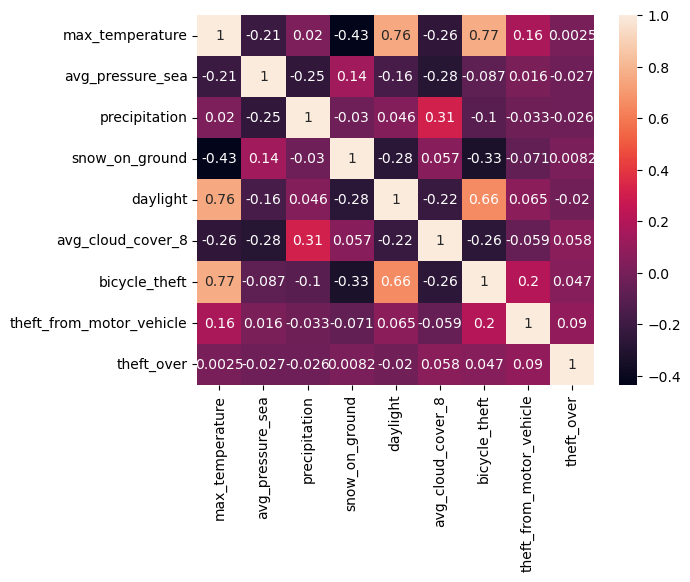

In [13]:
# Display matrix
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [14]:
#############
# Crimes
#############

In [15]:
# Merge weather and crime dataframes
alldata_df = pd.merge(weather_df, crime_df, on="date", how="left")
alldata_df

,date,max_temperature,min_temperature,max_relative_humidity,avg_relative_humidity,avg_pressure_sea,max_wind_speed,precipitation,rain,snow,...,lat_wgs84,assault,auto_theft,bicycle_theft,break_and_enter,homicide,robbery,shooting,theft_from_motor_vehicle,theft_over
0,2018-12-31,5.0,-2.5,94,79.5,100.78,21,13.6,13.6,0.0,...,43.756227,38,14,2,20,0,11,0,23,4
1,2018-12-31,5.0,-2.5,94,79.5,100.78,21,13.6,13.6,0.0,...,43.748845,38,14,2,20,0,11,0,23,4
2,2018-12-31,5.0,-2.5,94,79.5,100.78,21,13.6,13.6,0.0,...,43.715735,38,14,2,20,0,11,0,23,4
3,2018-12-31,5.0,-2.5,94,79.5,100.78,21,13.6,13.6,0.0,...,43.693661,38,14,2,20,0,11,0,23,4
4,2018-12-31,5.0,-2.5,94,79.5,100.78,21,13.6,13.6,0.0,...,43.752503,38,14,2,20,0,11,0,23,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166507,2015-01-01,-1.9,-8.1,69,60.0,101.27,36,0.0,0.0,0.0,...,43.649125,158,7,5,21,0,8,0,34,5
166508,2015-01-01,-1.9,-8.1,69,60.0,101.27,36,0.0,0.0,0.0,...,43.651448,158,7,5,21,0,8,0,34,5
166509,2015-01-01,-1.9,-8.1,69,60.0,101.27,36,0.0,0.0,0.0,...,43.664079,158,7,5,21,0,8,0,34,5
166510,2015-01-01,-1.9,-8.1,69,60.0,101.27,36,0.0,0.0,0.0,...,43.670798,158,7,5,21,0,8,0,34,5


In [16]:
# Drop the non-beneficial ID columns, from weather
# Full List
#alldata_df.drop(columns=['avg_pressure_sea', 'max_temperature','min_temperature', 'max_relative_humidity', 'avg_relative_humidity', 'max_wind_speed', 'precipitation','rain', 'snow' , 'snow_on_ground', 'avg_cloud_cover_8', 'daylight'], inplace=True)
alldata_df.drop(columns=['min_temperature','max_relative_humidity', 'avg_relative_humidity', 'max_wind_speed', 'rain', 'snow'], inplace=True)
alldata_df.head()

,date,max_temperature,avg_pressure_sea,precipitation,snow_on_ground,daylight,avg_cloud_cover_8,event_unique_id,occ_year,occ_month,...,lat_wgs84,assault,auto_theft,bicycle_theft,break_and_enter,homicide,robbery,shooting,theft_from_motor_vehicle,theft_over
0,2018-12-31,5.0,100.78,13.6,0.0,8.98,4.5,GO-20182392075,2018,December,...,43.756227,38,14,2,20,0,11,0,23,4
1,2018-12-31,5.0,100.78,13.6,0.0,8.98,4.5,GO-20182392937,2018,December,...,43.748845,38,14,2,20,0,11,0,23,4
2,2018-12-31,5.0,100.78,13.6,0.0,8.98,4.5,GO-20182392013,2018,December,...,43.715735,38,14,2,20,0,11,0,23,4
3,2018-12-31,5.0,100.78,13.6,0.0,8.98,4.5,GO-20182391325,2018,December,...,43.693661,38,14,2,20,0,11,0,23,4
4,2018-12-31,5.0,100.78,13.6,0.0,8.98,4.5,GO-20182390414,2018,December,...,43.752503,38,14,2,20,0,11,0,23,4


In [17]:
# Drop columns from crime
alldata_df.drop(columns=['event_unique_id', 'occ_year', 'occ_month', 'occ_day', 'occ_hour', 'premises_type', 'premises_type', 'hood_140', 'neighbourhood_140', 'long_wgs84', 'lat_wgs84'], inplace=True)
#alldata_df.drop(columns=['assault', 'auto_theft', 'bicycle_theft', 'break_and_enter', 'homicide', 'robbery', 'shooting', 'theft_from_motor_vehicle', 'theft_over'], inplace=True)
alldata_df.drop(columns=['assault', 'bicycle_theft', 'homicide', 'shooting','theft_from_motor_vehicle', 'theft_over' ], inplace=True)
alldata_df.head()

,date,max_temperature,avg_pressure_sea,precipitation,snow_on_ground,daylight,avg_cloud_cover_8,occ_dow,auto_theft,break_and_enter,robbery
0,2018-12-31,5.0,100.78,13.6,0.0,8.98,4.5,Monday,14,20,11
1,2018-12-31,5.0,100.78,13.6,0.0,8.98,4.5,Monday,14,20,11
2,2018-12-31,5.0,100.78,13.6,0.0,8.98,4.5,Monday,14,20,11
3,2018-12-31,5.0,100.78,13.6,0.0,8.98,4.5,Monday,14,20,11
4,2018-12-31,5.0,100.78,13.6,0.0,8.98,4.5,Monday,14,20,11


In [18]:
# Determine the number of unique values in each column.
columns =alldata_df.nunique()
columns

date                 1461
max_temperature       434
avg_pressure_sea      323
precipitation         112
snow_on_ground         22
daylight              383
avg_cloud_cover_8      16
occ_dow                 7
auto_theft             26
break_and_enter        37
robbery                21
dtype: int64

#### Corrolation Matrix

In [19]:
corr_matrix = alldata_df.corr()

print(corr_matrix)

                   max_temperature  avg_pressure_sea  precipitation  \
max_temperature           1.000000         -0.213220       0.020480   
avg_pressure_sea         -0.213220          1.000000      -0.247212   
precipitation             0.020480         -0.247212       1.000000   
snow_on_ground           -0.434995          0.139610      -0.030059   
daylight                  0.755311         -0.164226       0.046207   
avg_cloud_cover_8        -0.255053         -0.284567       0.312830   
auto_theft                0.095514          0.009738       0.023718   
break_and_enter          -0.000244         -0.024501      -0.018938   
robbery                   0.046107         -0.039296      -0.067857   

                   snow_on_ground  daylight  avg_cloud_cover_8  auto_theft  \
max_temperature         -0.434995  0.755311          -0.255053    0.095514   
avg_pressure_sea         0.139610 -0.164226          -0.284567    0.009738   
precipitation           -0.030059  0.046207           0

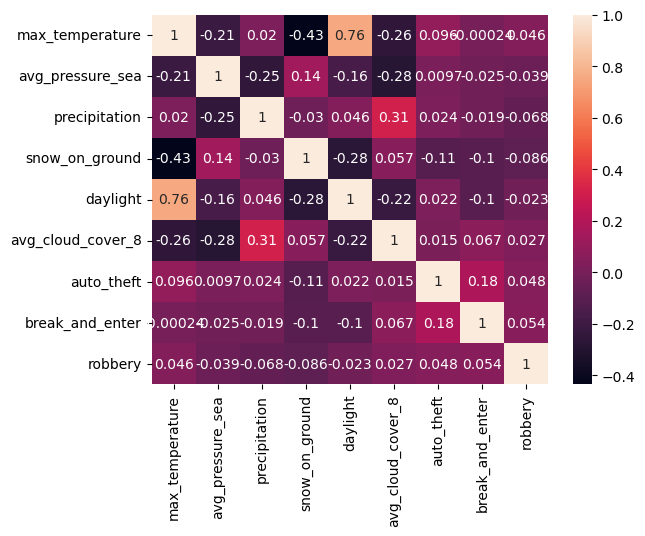

In [20]:
# Display matrix
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [21]:
###############
## Major Crimes
###############

In [22]:
# Merge weather and crime dataframes
alldata_df = pd.merge(weather_df, crime_df, on="date", how="left")


In [23]:
# Drop the non-beneficial ID columns, from weather
# Full List
#alldata_df.drop(columns=['avg_pressure_sea', 'max_temperature','min_temperature', 'max_relative_humidity', 'avg_relative_humidity', 'max_wind_speed', 'precipitation','rain', 'snow' , 'snow_on_ground', 'avg_cloud_cover_8', 'daylight'], inplace=True)
alldata_df.drop(columns=['min_temperature','max_relative_humidity', 'avg_relative_humidity', 'max_wind_speed', 'rain', 'snow'], inplace=True)
alldata_df.head()

,date,max_temperature,avg_pressure_sea,precipitation,snow_on_ground,daylight,avg_cloud_cover_8,event_unique_id,occ_year,occ_month,...,lat_wgs84,assault,auto_theft,bicycle_theft,break_and_enter,homicide,robbery,shooting,theft_from_motor_vehicle,theft_over
0,2018-12-31,5.0,100.78,13.6,0.0,8.98,4.5,GO-20182392075,2018,December,...,43.756227,38,14,2,20,0,11,0,23,4
1,2018-12-31,5.0,100.78,13.6,0.0,8.98,4.5,GO-20182392937,2018,December,...,43.748845,38,14,2,20,0,11,0,23,4
2,2018-12-31,5.0,100.78,13.6,0.0,8.98,4.5,GO-20182392013,2018,December,...,43.715735,38,14,2,20,0,11,0,23,4
3,2018-12-31,5.0,100.78,13.6,0.0,8.98,4.5,GO-20182391325,2018,December,...,43.693661,38,14,2,20,0,11,0,23,4
4,2018-12-31,5.0,100.78,13.6,0.0,8.98,4.5,GO-20182390414,2018,December,...,43.752503,38,14,2,20,0,11,0,23,4


In [24]:
# Drop columns from crime
alldata_df.drop(columns=['event_unique_id', 'occ_year', 'occ_month', 'occ_day', 'occ_hour', 'premises_type', 'premises_type', 'hood_140', 'occ_dow', 'neighbourhood_140', 'long_wgs84', 'lat_wgs84'], inplace=True)
#alldata_df.drop(columns=['assault', 'auto_theft', 'bicycle_theft', 'break_and_enter', 'homicide', 'robbery', 'shooting', 'theft_from_motor_vehicle', 'theft_over'], inplace=True)
alldata_df.drop(columns=['bicycle_theft', 'auto_theft', 'break_and_enter', 'robbery', 'theft_from_motor_vehicle', 'theft_over'], inplace=True)
alldata_df.head()

,date,max_temperature,avg_pressure_sea,precipitation,snow_on_ground,daylight,avg_cloud_cover_8,assault,homicide,shooting
0,2018-12-31,5.0,100.78,13.6,0.0,8.98,4.5,38,0,0
1,2018-12-31,5.0,100.78,13.6,0.0,8.98,4.5,38,0,0
2,2018-12-31,5.0,100.78,13.6,0.0,8.98,4.5,38,0,0
3,2018-12-31,5.0,100.78,13.6,0.0,8.98,4.5,38,0,0
4,2018-12-31,5.0,100.78,13.6,0.0,8.98,4.5,38,0,0


#### Corrolation Matrix

In [25]:
# Determine the number of unique values in each column.
columns =alldata_df.nunique()
columns

date                 1461
max_temperature       434
avg_pressure_sea      323
precipitation         112
snow_on_ground         22
daylight              383
avg_cloud_cover_8      16
assault                75
homicide                3
shooting                4
dtype: int64

In [26]:
corr_matrix = alldata_df.corr()

print(corr_matrix)

                   max_temperature  avg_pressure_sea  precipitation  \
max_temperature           1.000000         -0.213220       0.020480   
avg_pressure_sea         -0.213220          1.000000      -0.247212   
precipitation             0.020480         -0.247212       1.000000   
snow_on_ground           -0.434995          0.139610      -0.030059   
daylight                  0.755311         -0.164226       0.046207   
avg_cloud_cover_8        -0.255053         -0.284567       0.312830   
assault                   0.127383         -0.041199      -0.021002   
homicide                  0.037920         -0.012153       0.006199   
shooting                  0.011049          0.023980      -0.038266   

                   snow_on_ground  daylight  avg_cloud_cover_8   assault  \
max_temperature         -0.434995  0.755311          -0.255053  0.127383   
avg_pressure_sea         0.139610 -0.164226          -0.284567 -0.041199   
precipitation           -0.030059  0.046207           0.31283

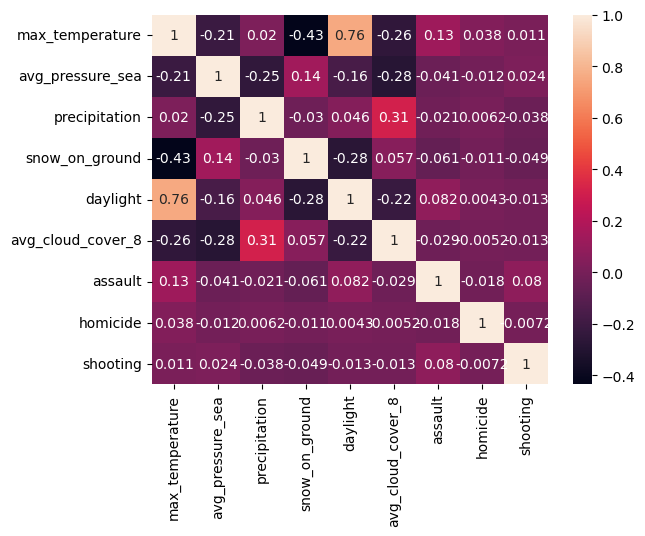

In [27]:
# Display matrix
sn.heatmap(corr_matrix, annot=True)
plt.show()